## 1. BASIC INFORMATION

In [1]:
# importing library & data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

wine = pd.read_csv('wine.csv', names = ['Alcohol','Malic Acid','Ash','Ash Alcalinity','Magnesium','Total Phenols','Flavanoids','Nonflavanoid Phenols',
                                       'Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline','Wine Class'])

In [2]:
# data head
wine.head()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# data column types
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Ash Alcalinity                178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total Phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid Phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color Intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Wine 

In [4]:
# data overview
listItem = []
for col in wine.columns :
    listItem.append([col,wine [col].dtype, wine[col].isna().sum(), round((wine[col].isna().sum()/len(wine[col])) * 100,2),
                    wine[col].nunique(), list(wine[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null %', 'N-Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null %,N-Unique,Unique Sample
0,Alcohol,float64,0,0.0,126,"[14.3, 13.94]"
1,Malic Acid,float64,0,0.0,133,"[1.81, 1.1]"
2,Ash,float64,0,0.0,79,"[2.38, 1.92]"
3,Ash Alcalinity,float64,0,0.0,63,"[22.0, 18.8]"
4,Magnesium,int64,0,0.0,53,"[128, 90]"
5,Total Phenols,float64,0,0.0,97,"[3.27, 2.75]"
6,Flavanoids,float64,0,0.0,132,"[1.59, 2.99]"
7,Nonflavanoid Phenols,float64,0,0.0,39,"[0.63, 0.47]"
8,Proanthocyanins,float64,0,0.0,101,"[1.46, 1.77]"
9,Color Intensity,float64,0,0.0,132,"[4.38, 2.6]"


## 2. EXPLORATORY DATA ANALYSIS
## 2a) Groupby Descriptions

In [5]:
# target classes
wine['Wine Class'].value_counts()

2    71
1    59
3    48
Name: Wine Class, dtype: int64

In [6]:
# description of numerical features
wine.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
# groupby description of numerical features
pd.set_option("max_row",None)
wine.groupby('Wine Class').describe().T

Wine Class                                    1           2           3
Alcohol                      count    59.000000   71.000000   48.000000
                             mean     13.744746   12.278732   13.153750
                             std       0.462125    0.537964    0.530241
                             min      12.850000   11.030000   12.200000
                             25%      13.400000   11.915000   12.805000
                             50%      13.750000   12.290000   13.165000
                             75%      14.100000   12.515000   13.505000
                             max      14.830000   13.860000   14.340000
Malic Acid                   count    59.000000   71.000000   48.000000
                             mean      2.010678    1.932676    3.333750
                             std       0.688549    1.015569    1.087906
                             min       1.350000    0.740000    1.240000
                             25%       1.665000    1.270000    2.587500
                             50%       1.770000    1.610000    3.265000
                             75%       1.935000    2.145000    3.957500
                             max       4.040000    5.800000    5.650000
Ash                          count    59.000000   71.000000   48.000000
                             mean      2.455593    2.244789    2.437083
                             std       0.227166    0.315467    0.184690
                             min       2.040000    1.360000    2.100000
                             25%       2.295000    2.000000    2.300000
                             50%       2.440000    2.240000    2.380000
                             75%       2.615000    2.420000    2.602500
                             max       3.220000    3.230000    2.860000
Ash Alcalinity               count    59.000000   71.000000   48.000000
                             mean     17.037288   20.238028   21.416667
                             std       2.546322    3.349770    2.258161
                             min      11.200000   10.600000   17.500000
                             25%      16.000000   18.000000   20.000000
                             50%      16.800000   20.000000   21.000000
                             75%      18.700000   22.000000   23.000000
                             max      25.000000   30.000000   27.000000
Magnesium                    count    59.000000   71.000000   48.000000
                             mean    106.338983   94.549296   99.312500
                             std      10.498949   16.753497   10.890473
                             min      89.000000   70.000000   80.000000
                             25%      98.000000   85.500000   89.750000
                             50%     104.000000   88.000000   97.000000
                             75%     114.000000   99.500000  106.000000
                             max     132.000000  162.000000  123.000000
Total Phenols                count    59.000000   71.000000   48.000000
                             mean      2.840169    2.258873    1.678750
                             std       0.338961    0.545361    0.356971
                             min       2.200000    1.100000    0.980000
                             25%       2.600000    1.895000    1.407500
                             50%       2.800000    2.200000    1.635000
                             75%       3.000000    2.560000    1.807500
                             max       3.880000    3.520000    2.800000
Flavanoids                   count    59.000000   71.000000   48.000000
                             mean      2.982373    2.080845    0.781458
                             std       0.397494    0.705701    0.293504
                             min       2.190000    0.570000    0.340000
                             25%       2.680000    1.605000    0.580000
                             50%       2.980000    2.030000    0.685000
                             75%       3

<Figure size 2880x2160 with 0 Axes>

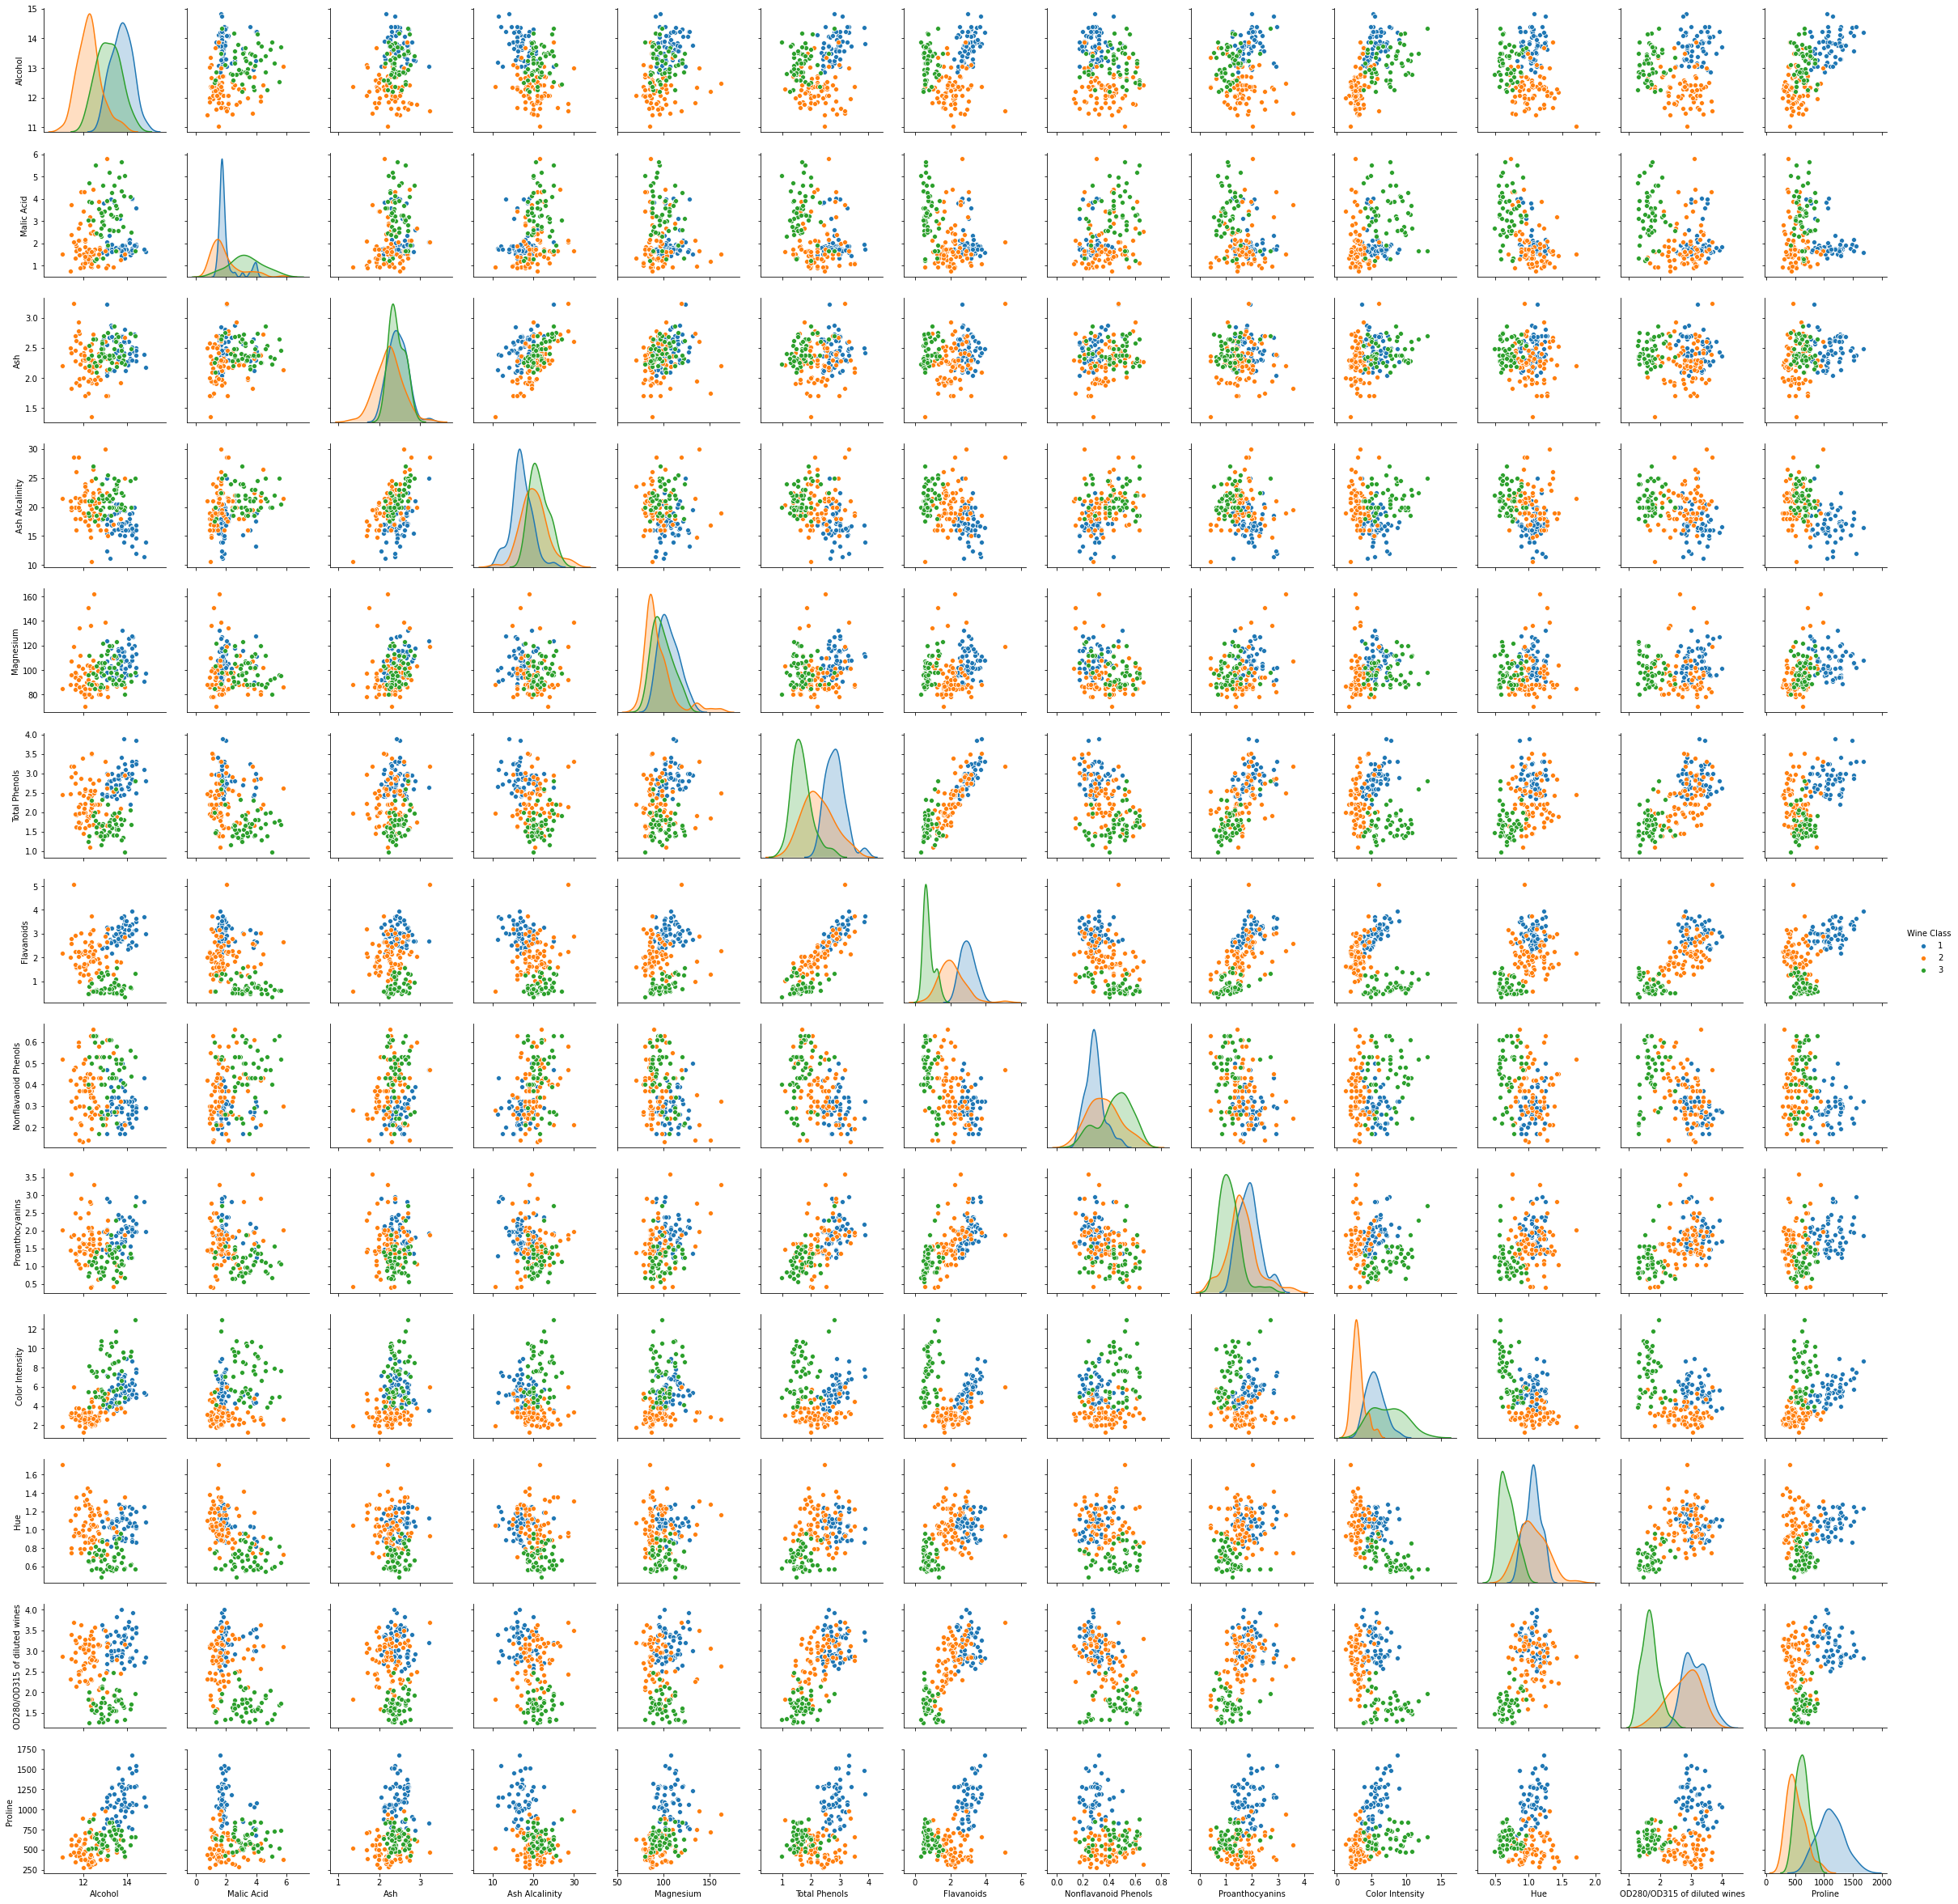

In [8]:
# creating a pairplot with my target variable as the hue
plt.figure(figsize=(40,30))
sns.pairplot(wine, hue = 'Wine Class')

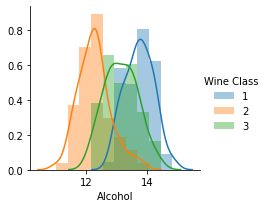

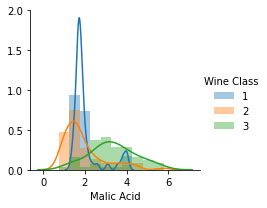

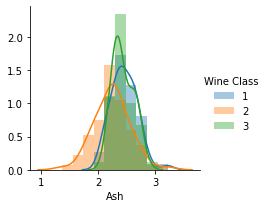

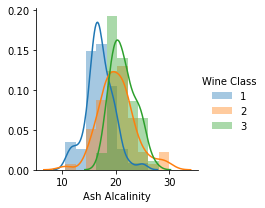

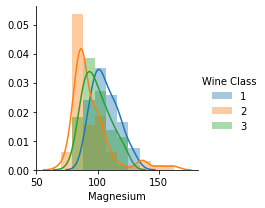

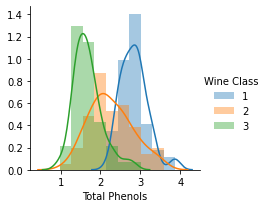

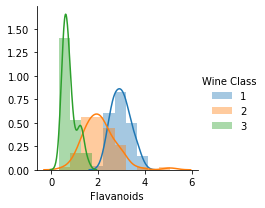

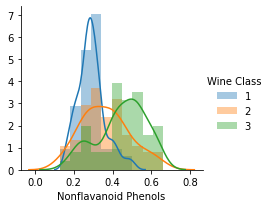

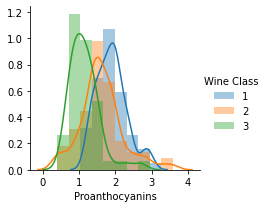

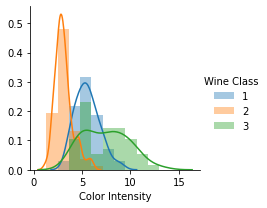

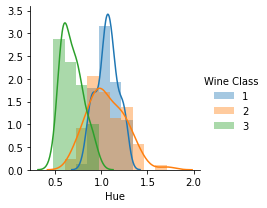

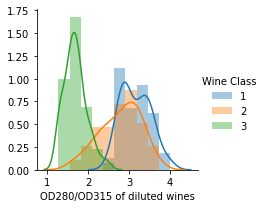

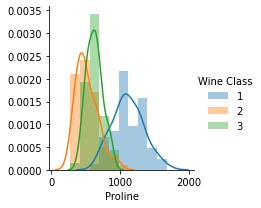

In [9]:
# numerical feature visualizations grouped by target feature
for i in wine.drop('Wine Class',axis=1).select_dtypes(exclude = 'object').columns:
    _, bins = np.histogram(wine[i])
    g = sns.FacetGrid(wine, hue="Wine Class")
    g = g.map(sns.distplot, i, bins = bins).add_legend()
    plt.show()

## 2b) Correlation Analysis

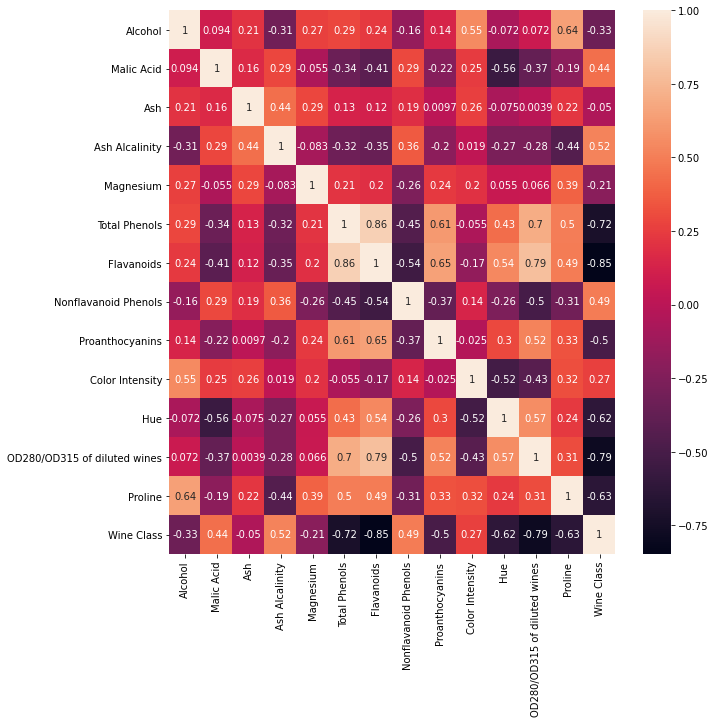

In [10]:
# pearson correlation
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True)

In terms of Pearson Correlation:
- There seems to be a strong (negative) linear relationship between Flavanoids, Proline, Total Phenols, OD280/OD315 of diluted wines & Hue feature towards Wine Classes
- There seems to be a moderate (negative) linear relationship between Alcohol & Proanthocyanins feature towards Wine Classes
- There seems to be a moderate (positive) linear relationship between Malic Acid, Ash Alcalinity & Nonflavanoid Phenols feature towards Wine Classes
- There seems to be a weak (negative) linear relationship between Ash feature towards Wine Classes
- There seems to be a weak (positive) linear relationship between Color Intensity feature towards Wine Classes


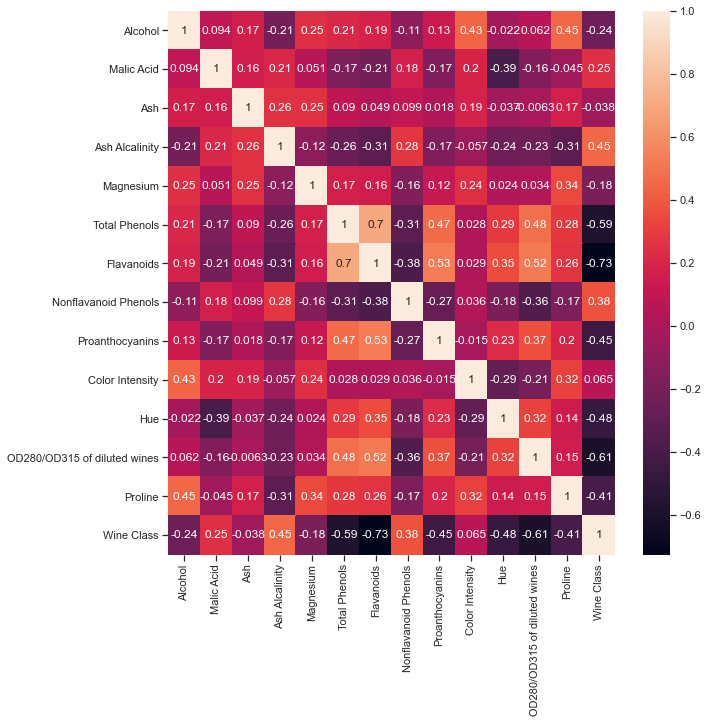

In [48]:
# kendall correlation
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(method='kendall'),annot=True)

In terms of Kendall Correlation:
- There seems to be a strong (negative) monotonic relationship between Flavanoids & OD280/OD315 of diluted wines feature towards Wine Classes
- There seems to be a moderate (negative) monotonic relationship between Total Phenols, Proline, Hue & Proanthocyanins feature towards Wine Classes
- There seems to be a moderate (positive) monotonic relationship between Ash Alcalinity & Nonflavanoid Phenols feature towards Wine Classes
- There seems to be a weak (negative) monotonic relationship between Alcohol & Ash feature towards Wine Classes
- There seems to be a weak (positive) monotonic relationship between Malic Acid & Color Intensity feature towards Wine Classes


In [12]:
# defining correlation ratio function to see the association between numerical-categorical features
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

# normal distribution check 
from scipy.stats import shapiro, skew, kurtosis
for i in wine.drop('Wine Class',axis = 1).select_dtypes(exclude = 'object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(wine['Wine Class'], wine[i])))
    if shapiro(wine[i])[1] < 0.05:
        print('Non-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(wine[i]), kurtosis(wine[i])))
    print('\n')

Alcohol
Correlation Ratio: 0.7790242117121318
Non-Normal Distribution
Skewness: -0.05104747165391963, Kurtosis -0.8622600987701743


Malic Acid
Correlation Ratio: 0.544857081967286
Non-Normal Distribution
Skewness: 1.0308694978039965, Kurtosis 0.257348285833094


Ash
Correlation Ratio: 0.36339445648458546
Non-Normal Distribution
Skewness: -0.1752067779256028, Kurtosis 1.0785761323125502


Ash Alcalinity
Correlation Ratio: 0.5386886530065165
Normal Distribution
Skewness: 0.21124732832155219, Kurtosis 0.44082313690028396


Magnesium
Correlation Ratio: 0.3526803493194902
Non-Normal Distribution
Skewness: 1.088914887210701, Kurtosis 2.0128060084773907


Total Phenols
Correlation Ratio: 0.7191634871588037
Non-Normal Distribution
Skewness: 0.08590677016719508, Kurtosis -0.8458573026752298


Flavanoids
Correlation Ratio: 0.8530975865357285
Non-Normal Distribution
Skewness: 0.025129482208428075, Kurtosis -0.8893650113675178


Nonflavanoid Phenols
Correlation Ratio: 0.48951924068322517
Non-Norm

In terms of Correlation Ratio:
- There seems to be a strong association between Flavanoids, OD280/OD315 of diluted wines & Proline towards Wine Class (target)
- There seems to be a moderate association between the rest of the features towards Wine Class 
- In terms of Shapiro value, all of the numerical features has a non-normal distribution


## 2c) Hypothesis Testing

In [13]:
# A/B testing using Kruskal-Wallis method
from scipy.stats import kruskal
krus = []
for i in wine.drop('Wine Class', axis=1).select_dtypes('number').columns:
    if kruskal(wine[wine['Wine Class'] == 1][i], 
               wine[wine['Wine Class'] == 2][i],
               wine[wine['Wine Class'] == 3][i])[1] < 0.05:
        krus.append('Accept H1')
    else:
        krus.append('Accept H0')

res = pd.DataFrame(data = [list(wine.drop('Wine Class', axis=1).select_dtypes('number').columns), krus]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,Alcohol,Accept H1
1,Malic Acid,Accept H1
2,Ash,Accept H1
3,Ash Alcalinity,Accept H1
4,Magnesium,Accept H1
5,Total Phenols,Accept H1
6,Flavanoids,Accept H1
7,Nonflavanoid Phenols,Accept H1
8,Proanthocyanins,Accept H1
9,Color Intensity,Accept H1


In [14]:
# post-hoc tests 
from pingouin import pairwise_ttests
for i in wine.drop('Wine Class', axis=1).select_dtypes('number').columns:
    print("###",i)
    print(pd.DataFrame(pairwise_ttests(data = wine, dv = i, between = 'Wine Class', parametric = False)))
    print("-"*75)

### Alcohol
     Contrast  A  B  Paired  Parametric   U-val       Tail         p-unc  \
0  Wine Class  1  2   False       False  4079.5  two-sided  1.669782e-20   
1  Wine Class  1  3   False       False  2252.5  two-sided  1.633498e-07   
2  Wine Class  2  3   False       False   410.0  two-sided  2.419678e-12   

   hedges  
0   2.886  
1   1.188  
2  -1.625  
---------------------------------------------------------------------------
### Malic Acid
     Contrast  A  B  Paired  Parametric   U-val       Tail         p-unc  \
0  Wine Class  1  2   False       False  2603.5  two-sided  1.739680e-02   
1  Wine Class  1  3   False       False   468.0  two-sided  2.929569e-09   
2  Wine Class  2  3   False       False   560.5  two-sided  5.950384e-10   

   hedges  
0   0.088  
1  -1.476  
2  -1.332  
---------------------------------------------------------------------------
### Ash
     Contrast  A  B  Paired  Parametric   U-val       Tail     p-unc  hedges
0  Wine Class  1  2   False   

In terms of Kruskal-Wallis test & its post-hoc test:
- It can be seen that all of the features has Accepted H1. It could be seen that, in terms of the existing features, there are statistically significant differences between the Wine Classes. In other words, all of these features has a connection in the differences of Wine Classes.  

## 3. MODEL DEVELOPMENT
## 3a) Model Preparation

In [15]:
# rescaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(wine.drop('Wine Class',axis=1))
scaled = pd.DataFrame(scaled, columns = wine.drop('Wine Class',axis=1).columns)
scaled['Wine Class'] = wine['Wine Class']

# splitting data to 80% train & 20% test data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(wine.drop('Wine Class', axis =1), wine['Wine Class'], test_size = 0.2, random_state=101)

# splitting data to 80% train & 20% test data
from sklearn.model_selection import train_test_split 
from collections import Counter
X_Train, X_Test, Y_Train, Y_Test = train_test_split(scaled.drop('Wine Class', axis =1), scaled['Wine Class'], test_size = 0.2, random_state=101)
print("y_train :",sorted(Counter(y_train).items()))
print("y_test  :",sorted(Counter(y_test).items()))

y_train : [(1, 45), (2, 58), (3, 39)]
y_test  : [(1, 14), (2, 13), (3, 9)]


## 3b) Model Comparison

### ----- On Accuracy -----

### Accuracy Comparison
LR: 0.950952 (0.032160)
DT: 0.929048 (0.055347)
RF: 0.985714 (0.028571)
KNN: 0.964762 (0.057309)
NB: 0.845238 (0.118192)
XGB: 0.971905 (0.034434)


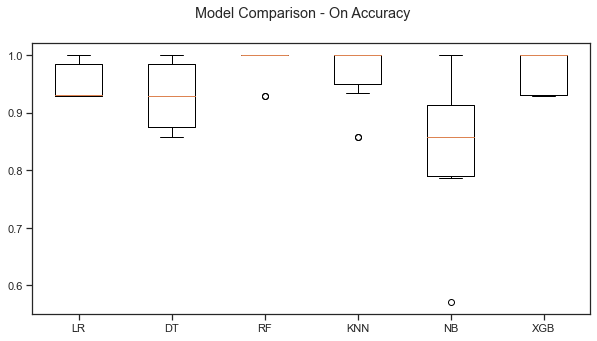

In [90]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score # to evaluate our model

# algorithms  to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('XGB', XGBClassifier()))

# scoring
results = []
names = []
scoring = 'accuracy'

print('### Accuracy Comparison')

# evaluate each model in turn for normal data
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
            
# boxplot algorithm comparison for normal
fig = plt.figure(figsize=(10,5))
fig.suptitle('Model Comparison - On Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- The highest overall Accuracy is achieved by RF (RandomForestClassifier) with an average Accuracy Score of 0.986 
- The second highest overall Accuracy is achieved by XGB (XGBoosttClassifier) with an average Accuracy Score of 0.972

### ----- On Matthews Correlation Coefficient (MCC) -----

### MCC Comparison
LR: 0.928574 (0.046931)
DT: 0.892813 (0.085872)
RF: 0.968507 (0.048151)
KNN: 0.950070 (0.081042)
NB: 0.770864 (0.172518)
XGB: 0.958042 (0.051527)


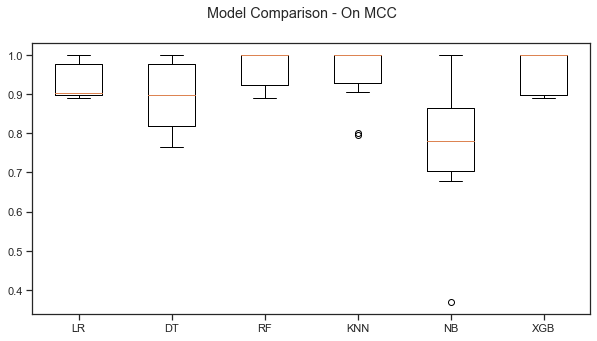

In [87]:
# importing metrics & make_scorer
from sklearn import metrics 
from sklearn.metrics import fbeta_score, make_scorer

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('XGB', XGBClassifier()))

# scoring
results = []
names = []
scoring = make_scorer(metrics.matthews_corrcoef)


print('### MCC Comparison')

# evaluate each model in turn for normal data
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
            
# boxplot algorithm comparison for normal
fig = plt.figure(figsize=(10,5))
fig.suptitle('Model Comparison - On MCC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- The highest overall MCC is achieved by RF (RandomForestClassifier) with an average MCC score of 0.969
- The second highest overall MCC is achieved by XGB (XGBoostClassifier) with an average MCC score of 0.958

### ----- On Log Loss -----

### Log Loss Comparison
LR: 0.170139 (0.214344)
DT: 2.203903 (1.725293)
RF: 0.146450 (0.046512)
KNN: 0.314961 (0.747251)
NB: 1.104632 (0.062175)
XGB: 0.088945 (0.073956)


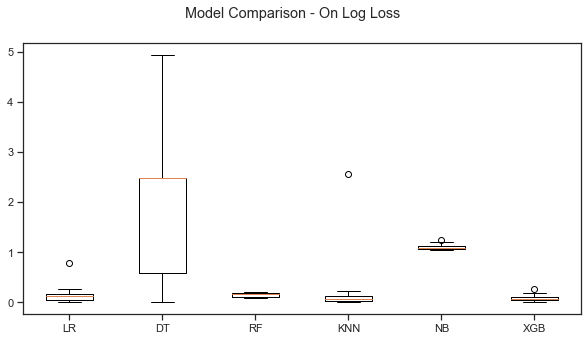

In [92]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))

# scoring
results = []
names = []
scoring = make_scorer(metrics.log_loss, needs_proba=True)


print('### Log Loss Comparison')

# evaluate each model in turn for normal data
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
            
# boxplot algorithm comparison for normal
fig = plt.figure(figsize=(10,5))
fig.suptitle('Model Comparison - On Log Loss')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- The lowest overall Log Loss is achieved by XGB (XGBoostClassifier) with an average MCC score of 0.089
- The second lowest overall Log Loss is achieved by RF (RandomForestClassifier) with an average MCC score of 0.146

## 3c) Model Selection & Evaluation

In [19]:
# in overall, RandomForest model is the best performer, thereby, chosen and fitted to the data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# classification report for train & test data
from sklearn.metrics import classification_report, confusion_matrix
rfc_pred = rfc.predict(x_test)
rfc_predprob = rfc.predict_proba(x_test)
print('# train data')
print(classification_report(y_train, rfc.predict(x_train)))
print('# test data')
print(classification_report(y_test, rfc_pred))

# train data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        39

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

# test data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.92      0.96        13
           3       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36



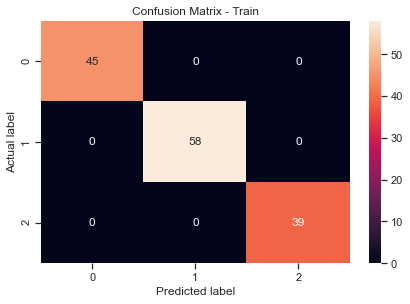

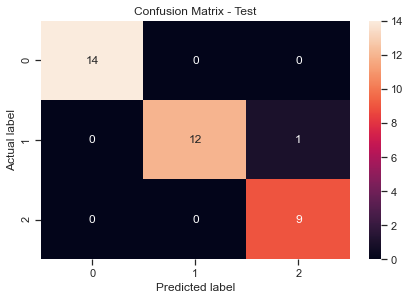

In [102]:
# confusion matrix for train data
cnf_matrix = confusion_matrix(y_train, rfc.predict(x_train))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, rfc_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
# Accuracy, MCC & Log Loss score
from sklearn import metrics
print(" Accuracy score :",metrics.accuracy_score(y_test, rfc_pred))
print(" MCC score      :",metrics.matthews_corrcoef(y_test, rfc_pred))
print(" Log Loss score :",metrics.log_loss(y_test, rfc_predprob))

 Accuracy score : 0.9722222222222222
 MCC score      : 0.9589742779399312
 Log Loss score : 0.16278182419067097


## 3d) Hyperparameter Tuning

In [32]:
# hyperparameter tuning through GridSearchCV

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = rfc,
                    refit = 'accuracy',
                    param_grid = {'random_state':list(np.arange(1,1001))}, 
                    scoring = 'accuracy',
                    cv = 4, n_jobs = -1)

# grid model fitting
grid.fit(x_train, y_train)

# best hyperparameters
grid.best_params_

{'random_state': 25}

In [35]:
# fitting tuned model
tuned = RandomForestClassifier(random_state=25)
tuned.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [38]:
# classification report for its train & test data
tuned_pred = tuned.predict(x_test)
tuned_predprob = tuned.predict_proba(x_test)
print('# train data')
print(classification_report(y_train, tuned.predict(x_train)))
print('# test data')
print(classification_report(y_test, tuned_pred))

# train data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        39

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

# test data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



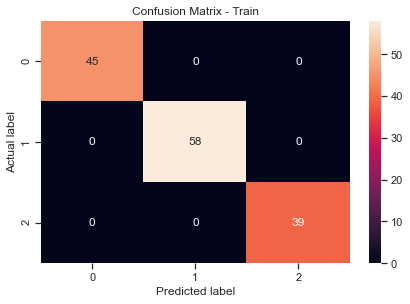

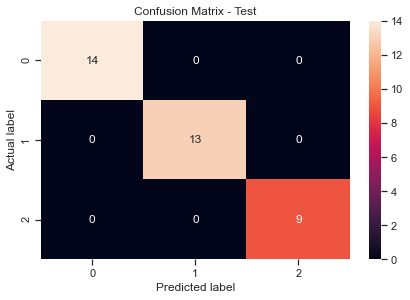

In [39]:
# confusion matrix for its train data
cnf_matrix = confusion_matrix(y_train, tuned.predict(x_train))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# confusion matrix for its test data
cnf_matrix = confusion_matrix(y_test, tuned_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
# Accuracy, MCC & Log Loss score
from sklearn import metrics
print(" Accuracy score :",metrics.accuracy_score(y_test, tuned_pred))
print(" MCC score      :",metrics.matthews_corrcoef(y_test, tuned_pred))
print(" Log Loss score :",metrics.log_loss(y_test, tuned_predprob))

 Accuracy score : 1.0
 MCC score      : 1.0
 Log Loss score : 0.15743001188812705


- It appears that our hyperparameter tuning helped our model in improving its predictions. Not only that the confusion matrix shows better numbers, but the tuned model also shows improvement in Accuracy, MCC & Log Loss scores. Though we only changed the random state number, the impact is quite significant.

## 3e) Learning Curve

train mean: 
[1. 1. 1. 1. 1.]
test mean: 
[0.7251634  0.7251634  0.78627451 0.98888889 0.98333333]
train sizes: 
[ 80 100 120 140 160]


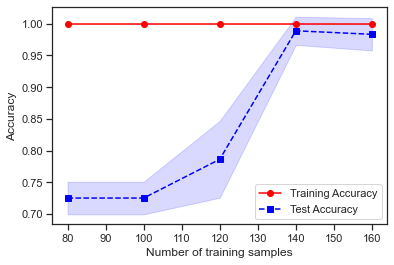

In [41]:
# importing learning curve library
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=tuned,
                                                       X=wine.drop('Wine Class', axis=1),
                                                       y=wine['Wine Class'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)
# mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
                                                        
print('train mean: ')
print(train_mean)
                                                        
# standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)


# same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('test mean: ')
print(test_mean)
print('train sizes: ')
print(train_sizes)

# plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- From the learning curve, we may see that our tuned RandomForestClassifier model gains more test accuracy as we increase the number of training samples (with the condition that our training accuracy is stable). Nevertheless, it reaches its peak at 140 samples and it begins to show a slight downward curve. 

## 3f) Feature Significance

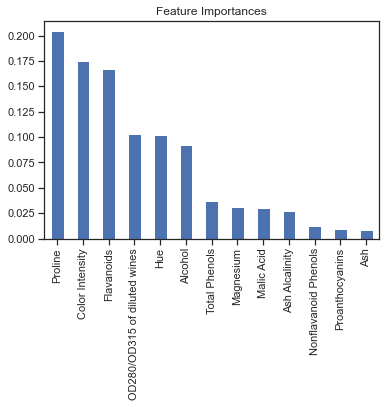

In [42]:
# feature importance
rfc_coef1 = pd.Series(tuned.feature_importances_, x_train.columns).sort_values(ascending= False)
rfc_coef1.plot(kind = 'bar', title='Feature Importances')
plt.show()

- From the feature importance, we can see which features that contribute to the most information gained. Those top three features are Proline, Color Intensity & Flavanoids feature. Special notice for Alcohol, Hue & OD280/OD315 of diluted wines that appears to approximate the top features. In other words, all of these features are important for our tuned RandomForestClassifier model in predicting Wine Classes

In [43]:
# permutation importance 
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(tuned, scoring = 'accuracy', random_state= 101).fit(x_test, y_test)
show_weights(perm, feature_names = list(x_test.columns))

Weight,Feature
0.2278 ± 0.0416,Proline
0.1111 ± 0.0497,Flavanoids
0.0778 ± 0.0544,Color Intensity
0.0556 ± 0.0609,Alcohol
0.0500 ± 0.0416,Magnesium
0.0444 ± 0.0272,Ash Alcalinity
0.0333 ± 0.0222,Ash
0.0222 ± 0.0222,OD280/OD315 of diluted wines
0.0222 ± 0.0222,Nonflavanoid Phenols
0.0222 ± 0.0416,Malic Acid


- From the permutation feature importance, we can see the green features that contribute the most to the drop of the overall model scores if the the feature's values are randomly shuffled. Those top three features that are in the darkest of green shades are Proline, Flavanoids & Color Intensity feature. Special notice for Alcohol, Magnesium & Ash Alcalinity feature that approximates the top features. In other words, all of these features are important for our tuned RandomForestClassifier model in predicting Wine Classes.

## 4. AUTOML ANALYSIS
## 4a) AutoML's Model Selection & Evaluation

In [121]:
# let's benchmark our tuned model performance with AutoML
from tpot import TPOTClassifier
tpot = TPOTClassifier(subsample = 0.8, verbosity = 2, warm_start=True, early_stop=20, n_jobs= -2)

In [49]:
# fitting the TPOTClassifier to our data
tpot.fit(x_train, y_train)

In [111]:
# exporting the file
tpot.export('tpot_wine_grades.py')

In [46]:
# fitting the exported AutoML model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
exported_pipeline = GradientBoostingClassifier(learning_rate=0.01, max_depth=9, max_features=0.05, min_samples_leaf=7, min_samples_split=2, n_estimators=100, subsample=0.6000000000000001)
exported_pipeline.fit(x_train, y_train)
results = exported_pipeline.predict(x_test)

In [113]:
# classification report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



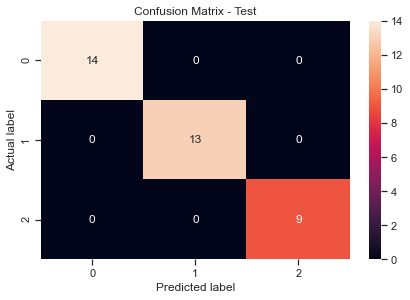

In [114]:
# confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, results)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [119]:
# Accuracy, MCC & Log Loss score
from sklearn import metrics
print(" Accuracy score :",metrics.accuracy_score(y_test, results))
print(" MCC score      :",metrics.matthews_corrcoef(y_test, results))
print(" Log Loss score :",metrics.log_loss(y_test, exported_pipeline.predict_proba(x_test)))

 Accuracy score : 1.0
 MCC score      : 1.0
 Log Loss score : 0.4841512079158383


## 4b) AutoML's Learning Curve

train mean: 
[0.975      0.993      0.97333333 0.99357143 1.        ]
test mean: 
[0.66797386 0.71372549 0.71960784 0.95       0.98333333]
train sizes: 
[ 80 100 120 140 160]


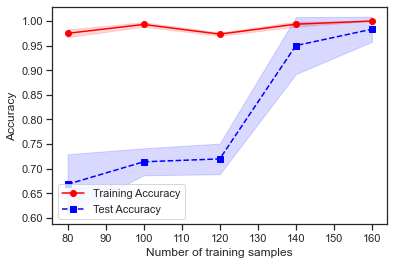

In [123]:
# importing learning curve library
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=exported_pipeline,
                                                       X=wine.drop('Wine Class', axis=1),
                                                       y=wine['Wine Class'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)
# mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
                                                        
print('train mean: ')
print(train_mean)
                                                        
# standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)


# same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('test mean: ')
print(test_mean)
print('train sizes: ')
print(train_sizes)

# plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- From the learning curve, we may see that our AutoML model gains more test accuracy as we increase the number of training samples (with the condition that our training accuracy is relatively stable). This curve means that our model may learn & perform better with larger datasets. Although the performance is already more than satisfactory, we could still give it more datasets in the future so that it could further improve its predictions. 

## 4c) AutoML's Feature Significance

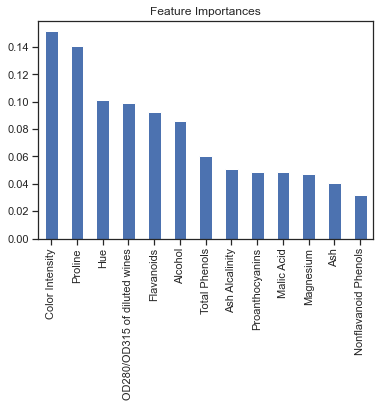

In [47]:
# feature importance
rfc_coef1 = pd.Series(exported_pipeline.feature_importances_, x_train.columns).sort_values(ascending= False)
rfc_coef1.plot(kind = 'bar', title='Feature Importances')
plt.show()

- From the feature importance, we can see which features that contribute to the most information gained. Those top three features are Color Intensity, Proline & Hue feature. Special notice for Flavanoids & OD280/OD315 of diluted wines that appears to approximate the top features. In other words, all of these features are important for our AutoML-generated GradienBoostingClassifier model in predicting Wine Classes

In [120]:
# permutation importance 
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
myperm = PermutationImportance(exported_pipeline, scoring = 'accuracy', random_state= 101).fit(x_test, y_test)
show_weights(myperm, feature_names = list(x_test.columns))

Weight,Feature
0.0611 ± 0.0416,Proline
0.0556 ± 0.0609,Color Intensity
0.0444 ± 0.0444,Alcohol
0.0389 ± 0.0272,Flavanoids
0.0222 ± 0.0416,Magnesium
0.0111 ± 0.0272,Ash Alcalinity
0.0056 ± 0.0222,Hue
0.0056 ± 0.0222,Malic Acid
0 ± 0.0000,OD280/OD315 of diluted wines
0 ± 0.0000,Proanthocyanins


- From the permutation feature importance, we can see the green features that contribute the most to the drop of the overall model scores if the the feature's values are randomly shuffled. Those top features that are in the darkest of green shades are Proline, Flavanoids, Alcohol & Color Intensity feature. Special notice for Magnesium feature that approximates the top features. In other words, all of these features are important for our AutoML-generated GradienBoostingClassifier model in predicting Wine Classes.

## 5. CONCLUSION

## 5a) On Features
Through all the tests & observations, there are many significant features that keeps showing up but the most consistent of all is the Proline feature. These feature could be the feature that has better association towards our target variable ("Wine Class") and may prove to be important for further studies.

## 5b) On Predictions
In model comparisons, our tuned RandomForestClassifier gets the highest and most satisfactory results. It even triumphs over our AutoML-generated GradienBoostingClassifier model through lower Log Loss score (their Accuracy & MCC scores being equal). In other words, our tuned RandomForestClassifier is the best model for our prediction purposes & recommended for further usage. 

## 5c) On Samples
There's an indication that the model predictions, whether its from our tuned RandomForestClassifier or the AutoML model, could improve with larger datasets. Although the tuned model indicates a slight downward curve after it reaches its climax, it still shows an overall upward trend. Therefore, it is still recommended for further tests & observations to have larger datasets.